In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn import*


In [3]:
df = pd.read_csv('/content/read_mixed_org.csv')
df1 = pd.read_csv('/content/label_detection.csv')
df2 = pd.read_csv('/content/tsne_read.csv')
#print(df)

FileNotFoundError: ignored

In [4]:
from ctypes import sizeof
# Fitting Random Forest Regression to the dataset
# import the regressor


from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(df)
#standardized_data1 = StandardScaler().fit_transform(df1)
print(standardized_data.shape)


# TSNE
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = df2 #[0:4, :]
labels_1000 = df1

#print (data_1000)


model = TSNE(n_components = 1, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


#x= tsne_data.iloc[:, :4].values



from sklearn.ensemble import RandomForestRegressor
 

#print(x.dtypes)
#y= df1.iloc [:, -1 :]

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(data_1000, labels_1000) 

print(tsne_data)
    #data_1000.dtypes, labels_1000.dtypes)



(40, 4)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-2476.3994  ]
 [  162.15947 ]
 [-2077.224   ]
 [  837.72974 ]
 [ 1070.8966  ]
 [-1210.634   ]
 [ 2553.8516  ]
 [ 1998.7443  ]
 [  613.0824  ]
 [ -498.724   ]
 [ 1441.7086  ]
 [ 2344.88    ]
 [  952.3956  ]
 [ -385.95496 ]
 [   52.876205]
 [  -55.74987 ]
 [  501.6036  ]
 [ 2159.9028  ]
 [  725.67163 ]
 [-1341.7101  ]
 [-1916.4641  ]
 [ -969.52466 ]
 [ -850.0594  ]
 [  386.8765  ]
 [ 1848.8057  ]
 [ -613.6275  ]
 [-1760.5784  ]
 [  276.26572 ]
 [-1088.4932  ]
 [-2267.553   ]
 [ 1704.391   ]
 [ -275.6518  ]
 [ 1571.045   ]
 [-1473.331   ]
 [-1608.7423  ]
 [ 1188.6748  ]
 [ -728.41583 ]
 [ -165.39638 ]
 [ 4774.1016  ]
 [ 1311.1287  ]]


<ipython-input-4-3344588b53bc>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(data_1000, labels_1000)


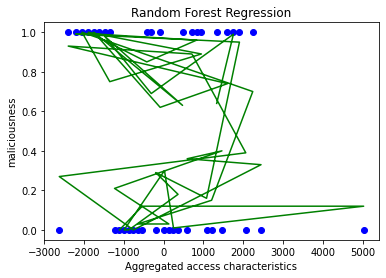

In [5]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values


X_grid = np.arange(min(tsne_data), max(tsne_data), 0.001)
#np.arange(min(x), max(x))

#pd.Series([np.arange(x.ts, x.tms, x.lba, .1) for x in df.itertuples()], index=df.index)
 
# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value                 
#X_grid = df2.reshape((len(df2), 1))

#print (X_grid.size)

# Scatter plot for original data
plt.scatter(df2, df1, color = 'blue') 
 
# plot predicted data
plt.plot(df2, regressor.predict(df2),  color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Aggregated access characteristics')
plt.ylabel('maliciousness')
plt.show()




In [14]:
#pip uninstall scikit-learn
#pip install scikit-learn==0.20.4

from sklearn.ensemble import RandomForestClassifier

#from sklearn import RandomForestClassifier
RandomForest = RandomForestClassifier(oob_score=True)
RandomForest.fit(df2, df1)
print('Score: ', RandomForest.score(df2, df1))
print(RandomForest.oob_score_)
#print(RandomForest.oob_score)

Score:  1.0
0.6


<ipython-input-14-e23c11245d23>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(df2, df1)
